# Session – 3: Weak Law of Large Numbers and Its Applications

## Tutorial-3

### A) 

Suppose that we are interested in computing the integral 𝐼 = $\int_0^∞ e^{-3x}x^5 dx$. We can express this
integral as an expectation in an infinitely many ways. For example, you find two functions 𝜓1 and
𝜓2 so that $ 𝐼 = E_{x \sim Exp(1)}(𝜓1(𝑋)) = E_{x \sim Exp(2)}(𝜓2(𝑋))$. Perform Monte Carlo integration using
these two different approaches and compare the approximations. Draw the approximate integrals
as a function of 𝑛 for both approaches.

Exact integration for the function f1(x): 0.16460905349794244


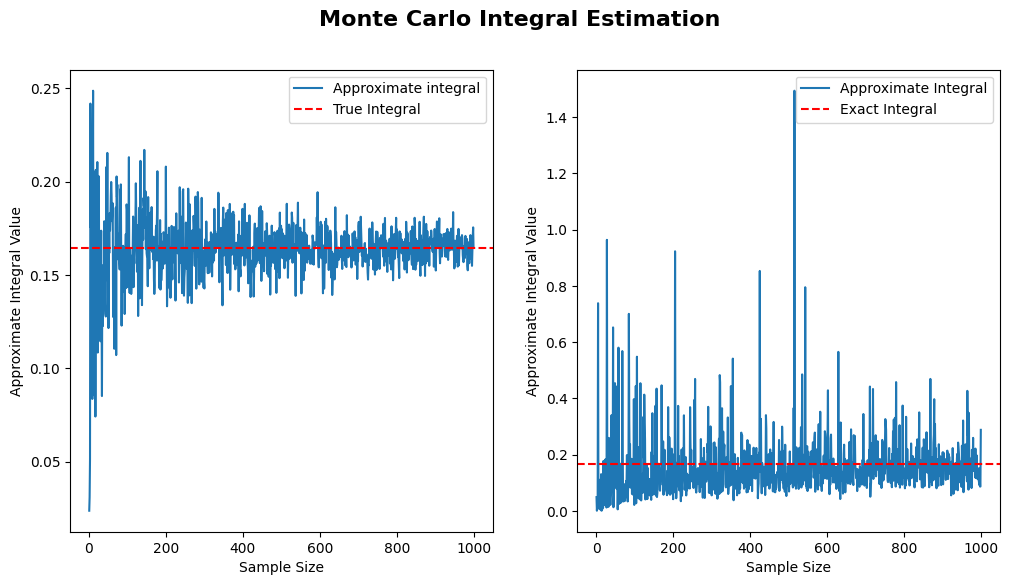

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate


def psi1(x):
    return (np.e**(-2*x)) * x**5

def psi2(x):
    return (x**5) / 3


def f1(x):
    return np.e**(-3*x) * (x**5)

# Perform exact integration for f1(x) from 0 to infinity using scipy's quad function
h = integrate.quad(f1, 0, +np.infty)
print('Exact integration for the function f1(x):', h[0])

# Set up array of sample sizes for Monte Carlo integration
n_vals = np.arange(1, 1000, 1)
I1 = []  # Store approximate integral values for psi1(x)
I2 = []  # Store approximate integral values for psi2(x)

# Perform Monte Carlo integration for psi1(x) and psi2(x) for various sample sizes
for n in n_vals:
    # Generate n random numbers from an exponential distribution with mean 1
    x = np.random.exponential(1, n)
    # Evaluate psi1(x) for each random number and calculate the mean
    g_vals_exp = [psi1(i) for i in x]
    approx_integral = np.mean(g_vals_exp)
    I1.append(approx_integral)

    # Generate n random numbers from an exponential distribution with mean 1/3
    x = np.random.exponential(1/3, n)
    # Evaluate psi2(x) for each random number and calculate the mean
    g_vals_exp = [psi2(i) for i in x]
    approx_integral = np.mean(g_vals_exp)
    I2.append(approx_integral)

# Plot the results
plt.figure(figsize=(12, 6))

# Plot for psi1(x)
plt.subplot(1, 2, 1)
plt.plot(n_vals, I1, label='Approximate integral')
plt.axhline(h[0], color='red', linestyle='--', label='True Integral')
plt.xlabel('Sample Size')
plt.ylabel('Approximate Integral Value')
plt.legend()  # Show legend with labels

# Plot for psi2(x)
plt.subplot(1, 2, 2)
plt.plot(n_vals, I2, label='Approximate Integral')
plt.axhline(h[0], color='red', linestyle='--', label='Exact Integral')
plt.xlabel('Sample Size')
plt.ylabel('Approximate Integral Value')
plt.legend()  # Show legend with labels

# Set the title for the entire figure
plt.suptitle('Monte Carlo Integral Estimation', fontsize=16, fontweight='bold')
plt.show()


### B)

Suppose that we are interested in approximating the integral $\int_2^{+∞} \frac{1}{𝜋(1+𝑥2)} 𝑑𝑥 $. Note that this is the
probability P(𝑋 > 2) where 𝑋~𝒞(0,1), standard Cauchy distribution. We consider four different
approaches to estimate the integral.

a) $𝐼_1 = \frac{1}{n} \sum_{j=1}^n 𝑌_𝑗$, where $𝑌_𝑗 = 1$ if $𝑋_𝑗 > 2$, else zero.

In [2]:
import numpy as np

# Set the sample size
n = 1000

# Generate a sample of 1000 random numbers from a standard Cauchy distribution
x = np.random.standard_cauchy(n)

# Calculate the estimate of the integral of the indicator function over the interval [2, ∞)
# This is done by counting the number of elements in x that are greater than 2 and dividing by the total number of elements
I1 = np.sum(x > 2) / n

# Print the approximate integral value
print('approximate integral:', I1)


approximate integral: 0.142


b) $𝐼_2 = \frac{1}{2n} \sum_{j=1}^n 𝑌_𝑗$, where $𝑌_𝑗 = 1$ if $|𝑋_𝑗| > 2$, else zero.

In [3]:
import numpy as np

# Set the sample size
n = 1000

# Generate a sample of 1000 random numbers from a standard Cauchy distribution
x = np.random.standard_cauchy(n)

# Calculate the estimate of the integral of the modified indicator function over the interval [2, ∞)
# This is done by counting the number of elements in x with absolute values greater than 2 and dividing by 2 times the total number of elements
I2 = np.sum(abs(x) > 2) / (2 * n)

# Print the approximate integral value
print('approximate integral:', I2)


approximate integral: 0.1425


c)Express the integral as $𝐼 = \frac{1}{2} − \int_0^2 \frac{1}{𝜋(1+𝑥^2)} $ 𝑑𝑥. Consider another approximation $ 𝐼_3 = \frac{1}{2} − \frac{1}{n}\sum_{j=1}^{n}
𝜓(𝑈_𝑗)$, where $𝑈_1, ⋯ , 𝑈_𝑛 \sim Uniform(0,2)$. What is the choice of 𝜓 here?

In [25]:
import numpy as np

# Define the function psi(x)
def psi(x):
    return 1 / (np.pi * (1 + x**2))  # add psi b-a here 

# Set the sample size
n = 1000

# Define the interval [a, b]
a = 0
b = 2

# Generate n random numbers uniformly distributed between a and b
u = np.random.uniform(a, b, n)


I3 = 0.5 - (b - a) * np.mean(psi(u))

# Print the approximate integral value
print('Approximate integral (I3):', I3)


Approximate integral (I3): 0.14039500198557164


d) Show the required integral can be expressed as $𝐼 = \int_0^{1/2} \frac{𝑦^{−2}}
{𝜋(1+𝑦^{−2})} 𝑑𝑦$. Consider the
appropriation $𝐼_4 = \frac{1}{𝑛} \sum_{j=1}^{n} 𝜓(𝑈_𝑗)$, where $𝑈_1, ⋯ , 𝑈_𝑛 \sim Uniform(0,0.5)$. What is the choice
of 𝜓 here.

In [6]:

import numpy as np

# Define the modified function psi(x)
def psi(x):
    return 1 / (np.pi * (1 + x**2))  # add b-a here

# Set the sample size
n = 5

# Define the interval [a, b]
a = 0  
b = 0.5

# Generate n random numbers uniformly distributed between a and b
u = np.random.uniform(a, b, n)


I4 = (b - a) * np.mean(psi(u))

# Print the approximate integral value
print('Approximate integral (I4):', I4)



Approximate integral (I4): 0.14901772579518524


e)

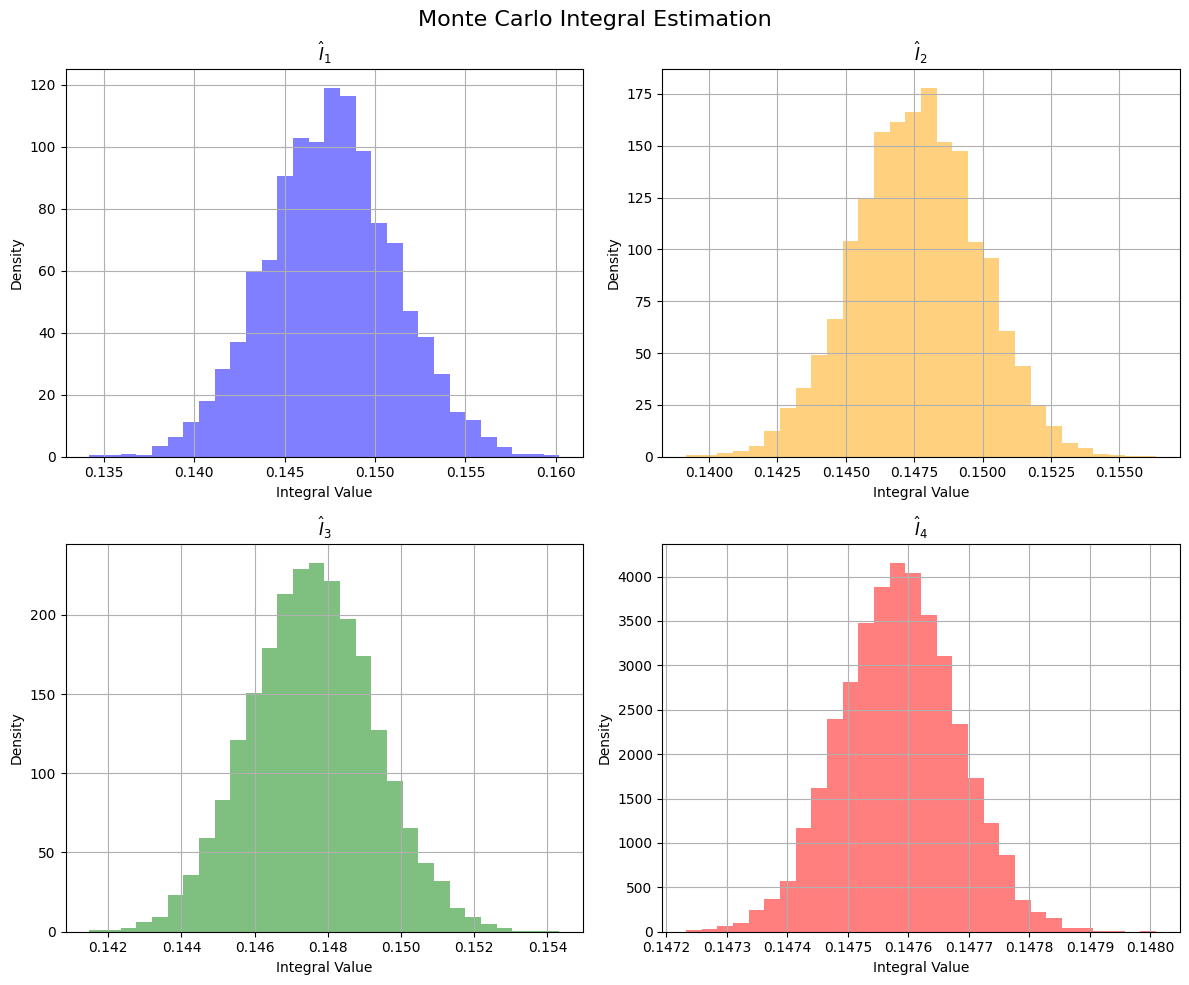

Variance of I1: 1.2747221209600002e-05
Variance of I2: 5.140599846774999e-06
Variance of I3: 2.908251225052058e-06
Variance of I4: 9.410282312196514e-09
Standard Error (SE) of I1: 3.570325084582635e-05
Standard Error (SE) of I4: 9.700660963149117e-07
Standard Error Reduction Factor (I1 / I4): 36.804967188788375


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n = 10**4  # Sample size
M = 10**4  # Number of iterations

# Lists to store integral approximations
I1 = []
I2 = []
I3 = []
I4 = []

# Monte Carlo estimation for I1: x > 2
for _ in range(M):
    x = np.random.standard_cauchy(n)
    approx_integral1 = np.sum(x > 2) / n
    I1.append(approx_integral1)

# Monte Carlo estimation for I2: |x| > 2
for _ in range(M):
    x = np.random.standard_cauchy(n)
    approx_integral2 = np.sum(np.abs(x) > 2) / (2 * n)
    I2.append(approx_integral2)

# Monte Carlo estimation for I3: using psi(x)
def psi(x):
    return 1 / (np.pi * (1 + x**2))

for _ in range(M):
    a = 0
    b = 2
    u = np.random.uniform(a, b, n)
    approx_integral3 = 0.5 - (b - a) * np.mean(psi(u))
    I3.append(approx_integral3)

# Monte Carlo estimation for I4: using modified psi2(x)
def psi2(x):
    return 1 / (np.pi * (1 + x**2))

for _ in range(M):
    a = 0
    b = 0.5
    u = np.random.uniform(a, b, n)
    approx_integral4 = (b - a) * (np.sum(psi2(u)) / (n))
    I4.append(approx_integral4)

# Create subplots for each Monte Carlo estimation
plt.figure(figsize=(12, 10))

# Plot histogram for I1
plt.subplot(2, 2, 1)
plt.hist(I1, bins=30, density=True, alpha=0.5, color='blue')
plt.title(r'$\widehat{I}_1$')
plt.xlabel('Integral Value')
plt.ylabel('Density')
plt.grid(True)

# Plot histogram for I2
plt.subplot(2, 2, 2)
plt.hist(I2, bins=30, density=True, alpha=0.5, color='orange')
plt.title(r'$\widehat{I}_2$')
plt.xlabel('Integral Value')
plt.ylabel('Density')
plt.grid(True)

# Plot histogram for I3
plt.subplot(2, 2, 3)
plt.hist(I3, bins=30, density=True, alpha=0.5, color='green')
plt.title(r'$\widehat{I}_3$')
plt.xlabel('Integral Value')
plt.ylabel('Density')
plt.grid(True)

# Plot histogram for I4
plt.subplot(2, 2, 4)
plt.hist(I4, bins=30, density=True, alpha=0.5, color='red')
plt.title(r'$\widehat{I}_4$')
plt.xlabel('Integral Value')
plt.ylabel('Density')
plt.grid(True)

# Adjust layout
plt.suptitle('Monte Carlo Integral Estimation', fontsize=16)
plt.tight_layout()
plt.show()

# Compute variance for each estimator
varI1 = np.var(I1)
varI2 = np.var(I2)
varI3 = np.var(I3)
varI4 = np.var(I4)

# Display variances
print("Variance of I1:", varI1)
print("Variance of I2:", varI2)
print("Variance of I3:", varI3)
print("Variance of I4:", varI4)


# Calculate standard errors (SE) for I1 and I4
se_I1 = np.sqrt(varI1) / np.sqrt(M)
se_I4 = np.sqrt(varI4) / np.sqrt(M)

# Calculate the ratio of standard errors
se_reduction_factor = se_I1 / se_I4

# Print the results
print("Standard Error (SE) of I1:", se_I1)
print("Standard Error (SE) of I4:", se_I4)
print("Standard Error Reduction Factor (I1 / I4):", se_reduction_factor)






### C) 

Consider the following function:
$f(x) = 
\begin{cases}
    \frac{1}{\sqrt{2x}} e^{-\frac{x^2}{4}}, & \text{if } 0 < x < \infty \\
   \  0 & \text{otherwise}
\end{cases}$

i) Using Monte Carlo integration, compute the integral of the above function on the interval
[𝑎, 𝑏] = [2,5] based on $𝑛 = 10^6$ samples. Call the integral $𝐼_𝑛$.

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x) according to the provided formula
def f(x):
    return np.where((x>0), np.sqrt(1/(2*x))*np.e**(x**2 / -4), 0)

# Set the number of samples for the Monte Carlo simulation
n = 10**6

# Define the integration limits
a = 2
b = 5

# Generate n uniformly distributed random samples between a and b
u = np.random.uniform(a, b, n)

# Approximate the integral using Monte Carlo estimation
# The integral is approximated by taking the mean of the function values at the sampled points
In = (b-a) * np.mean(f(u))

# Print the approximate integral
print(In)


0.12303011644714736


ii) Using the inbuilt function in R/Python integrate the function in the given interval, call it 𝐼.

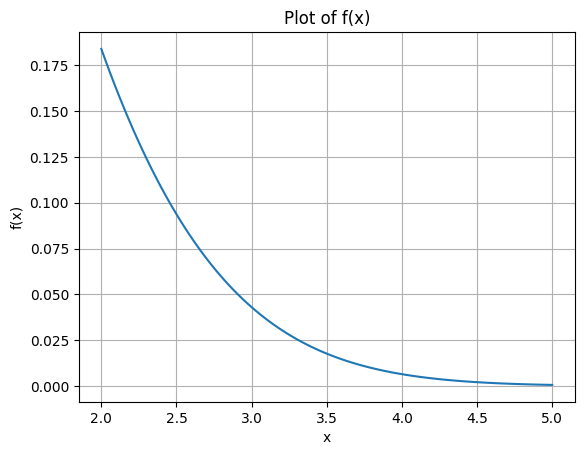

Integration value using numerical integration: 0.12290701094708963


In [49]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate


# Define the range for x values
a = 2
b = 5
x_val = np.linspace(a, b, 100)

# Plot the function g(x)
plt.plot(x_val, f(x_val))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of f(x)')
plt.grid(True)
plt.show()

# Calculate the definite integral of g(x) from a to b
I, error = integrate.quad(f, a, b)
print("Integration value using numerical integration:", I)


c) Print the absolute difference between $𝐼_𝑛$ and 𝐼 as a function of 𝑛.

In [50]:
print("Absolute difference between I_n and I:", abs(In - I))

Absolute difference between I_n and I: 0.0001231055000577297


d) By using computer simulation, show that 𝐼𝑛 converges to the integral as 𝑛 → ∞.

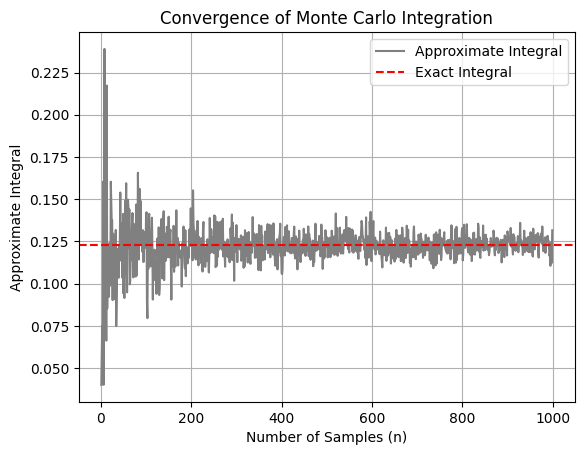

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x) according to the provided formula
def f(x):
    return np.where((x > 0), np.sqrt(1 / (2 * x)) * np.exp(x**2 / -4), 0)

# Set the integration limits
a = 2
b = 5

# Define the number of Monte Carlo samples
n = 10**3

# Initialize an array to store the approximate integral values
In_array = []

# Loop to compute the approximate integral for increasing sample sizes
for i in range(1, n):
    # Generate i uniformly distributed random samples between a and b
    u = np.random.uniform(a, b, i)
    # Evaluate the function f at these sampled points
    f_vals_unif = [f(x) for x in u]
    # Approximate the integral using the mean of the function values
    approx_integral = (b - a) * np.mean(f_vals_unif)
    # Append the result to the array
    In_array.append(approx_integral)

# Array of sample sizes
n_vals = np.arange(1, n)


# Plot the approximate integral values against the number of samples
plt.plot(n_vals, In_array, color='grey', label='Approximate Integral')
plt.axhline(I, color='red', linestyle='--', label='Exact Integral')

# Label the axes and the plot
plt.xlabel('Number of Samples (n)')
plt.ylabel('Approximate Integral')
plt.title('Convergence of Monte Carlo Integration')
plt.legend()
plt.grid(True)
plt.show()


### D)

 Let $𝑋 = 𝑈^2$ , where 𝑈 follows Uniform(0,1) distribution. Show that for any number 𝑚 ≥ 1.
$ 𝑚𝑃 (0 < 𝑋 < 1/m) = \sqrt{𝑚} $ . Using this equality, approximate $\sqrt{19}$ by simulating 𝑛 random numbers
from Uniform(0,1) distribution. Compute the standard error associated with the approximation
based on a sample of size 𝑛

In [55]:
import numpy as np

# Number of samples for the Monte Carlo simulation
n = 10000

# Generate n uniformly distributed random samples between 0 and 1
u = np.random.uniform(0, 1, n)

# Transform the uniform samples to follow the distribution of x = u^2
x_vals = u**2

# Define the parameter m
m = 19

# Initialize a counter to count how many x values fall in the interval (0, 1/m)
count = 0

# Loop over the transformed x values
for x in x_vals:
    if (x > 0) & (x < 1/m):
        count += 1

# Approximate the value of sqrt(m) using the proportion of x values in the interval
approx_val_root_m = m * count / n

# Calculate the standard error of the approximation
standard_error = np.sqrt(m) - approx_val_root_m

# Print the results
print("Approximation of sqrt(m):", approx_val_root_m)
print("Standard error of approximation:", standard_error)


Approximation of sqrt(m): 4.3339
Standard error of approximation: 0.024998943540674112


### E)

 Let $I = \int_1^2 \frac{e^{-x^2/2}}{\sqrt{2\pi}} \, dx.$ This integral gives the probability P(1 < 𝑋 < 2) where 𝑋 ∼ 𝒩(0,1).

a) Estimate 𝐼 using the basic Monte Carlo method. Use 𝑛 = 106 simulations and compute the estimated standard error.

Approximation of the integral: 0.13583818559093874
Exact integral value using numerical integration: 0.13590512198327787
Standard error of the approximation: 6.693639233912307e-05


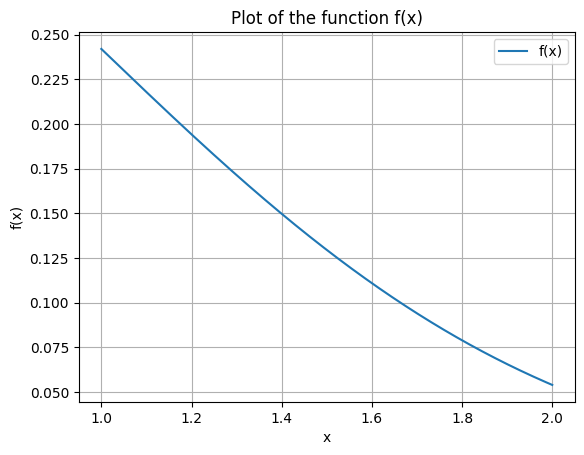

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

# Define the function f(x) according to the provided formula
def f(x):
    return (np.exp((-x**2) / 2)) / (np.sqrt(2 * np.pi))

# Set the integration limits
a = 1
b = 2

# Number of samples for the Monte Carlo simulation
n = 10**6

# Set a random seed for reproducibility
np.random.seed(42)

# Generate n uniformly distributed random samples between a and b
u = np.random.uniform(a, b, n)

# Approximate the integral using Monte Carlo estimation
approx_integral = (b - a) * np.mean(f(u))

# Calculate the exact integral value using numerical integration
exact_integral_value, error = integrate.quad(f, a, b)

# Calculate the standard error of the approximation
standard_error = exact_integral_value - approx_integral

# Print the results
print("Approximation of the integral:", approx_integral)
print("Exact integral value using numerical integration:", exact_integral_value)
print("Standard error of the approximation:", standard_error)

# Optional: Plot the function over the integration interval
x = np.linspace(a, b, 1000)
y = f(x)
plt.plot(x, y, label='f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of the function f(x)')
plt.legend()
plt.grid(True)
plt.show()


b) Theory question, do it yourself


c) For each 𝑛 = 1,2, ⋯ , 104, compute the integral and call it $\hat{𝐼_𝑛}$ and plot the values against
the sample size 𝑛. Check whether the sequence converges to 𝐼. In the same plot add two
lines $\hat{𝐼_𝑛}$ ∓ 2 × SE($\hat{𝐼_𝑛}$)

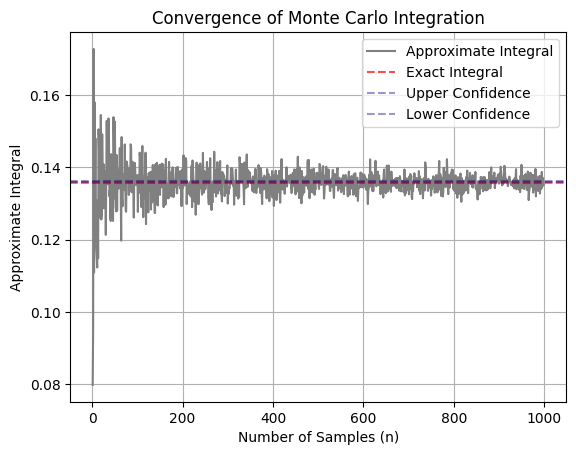

In [82]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x) - assuming it's defined elsewhere in the code

# Define integration limits
a = 1
b = 2

# Number of iterations
n = 10**3

# Array to store the approximate integral values
approx_integral_array = []

# Perform Monte Carlo integration for increasing sample sizes
for i in range(1, n):
    # Generate i uniformly distributed random samples between a and b
    u = np.random.uniform(a, b, i)
    # Evaluate the function f at these sampled points
    f_vals_unif = [f(x) for x in u]
    # Approximate the integral using the mean of the function values
    approx_integral = (b - a) * np.mean(f_vals_unif)
    # Append the result to the array
    approx_integral_array.append(approx_integral)

# Array of sample sizes
n_vals = np.arange(1, n, 1)

# Plot the approximate integral values against the number of samples
plt.plot(n_vals, approx_integral_array, color='grey', label='Approximate Integral')

# Plot a horizontal line for the exact integral value
plt.axhline(exact_integral_value, color='red', linestyle='--', label='Exact Integral',alpha = 0.7)

# Calculate and plot confidence intervals
SE = np.sqrt(np.var(approx_integral_array) / (n - 1))
upper_confidence_line = plt.axhline(exact_integral_value + 2 * SE, linestyle='--', color='darkblue', alpha=0.4)
lower_confidence_line = plt.axhline(exact_integral_value - 2 * SE, linestyle='--', color='darkblue', alpha=0.4)

# Label the axes and the plot
plt.xlabel('Number of Samples (n)')
plt.ylabel('Approximate Integral')
plt.title('Convergence of Monte Carlo Integration')
# Add a legend for the confidence intervals without removing existing legends
existing_handles, existing_labels = plt.gca().get_legend_handles_labels()
plt.legend(existing_handles + [upper_confidence_line, lower_confidence_line], existing_labels + ['Upper Confidence', 'Lower Confidence'])
plt.grid(True)
plt.show()


d) Based on 𝑀 = $10^6$ replications, obtain the sampling distribution of $\hat{𝐼_𝑛}$ for 𝑛 ∈
{10,50, 100, 500}. What are your findings about these sampling distributions whether
they are showing a similar pattern. State the underlying theoretical idea.

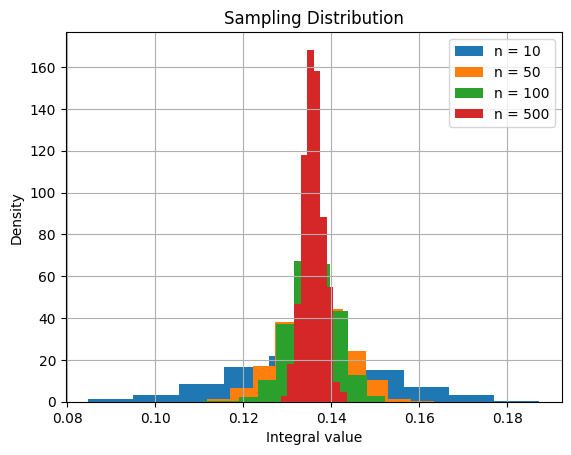

As the n tends to infinity, the variance/standard error tends to zero, meaning
the approximate integral approaches the exact integral.


In [85]:
import numpy as np
import matplotlib.pyplot as plt

# Define the values of n for different sample sizes
n_vals = [10, 50, 100, 500]

# Number of Monte Carlo iterations
M = 10**3

# Integration limits
a = 1
b = 2

# Loop over different sample sizes
for n in n_vals:
    # Array to store the approximate integral values for each iteration
    approx_integral_array = []
    
    # Perform Monte Carlo integration for M iterations
    for _ in range(1, M):
        # Generate n uniformly distributed random samples between a and b
        u = np.random.uniform(a, b, n)
        # Evaluate the function f at these sampled points
        f_vals_unif = [f(x) for x in u]
        # Approximate the integral using the mean of the function values
        approx_integral = (b - a) * np.mean(f_vals_unif)
        # Append the result to the array
        approx_integral_array.append(approx_integral)
    
    # Plot the histogram of approximate integral values for the current sample size
    plt.hist(approx_integral_array, density=True, label=f'n = {n}')
    

# Label the axes and the plot
plt.xlabel('Integral value')
plt.ylabel('Density')
plt.title('Sampling Distribution')
plt.legend()
plt.grid(True)
plt.show()

# Print a statement about the convergence of the approximate integral towards the exact integral
print("As the n tends to infinity, the variance/standard error tends to zero, meaning\nthe approximate integral approaches the exact integral.")


## Handout-3

Q) This handout demonstrates the conversion of a definite integral to an expectation of a random
variable and evaluate the expectation using the WLLN. The demonstration of the Monte Carlo
integration is carried out using the function $𝑔(𝑥) = 3𝑥^2 + 2𝑥 + 5$  and the interval of integration is
[0,3].

### a)

Define the function and the domain of the integration. Use the integrate function to compute the
exact integral. You can do it by using a pen and paper as well.

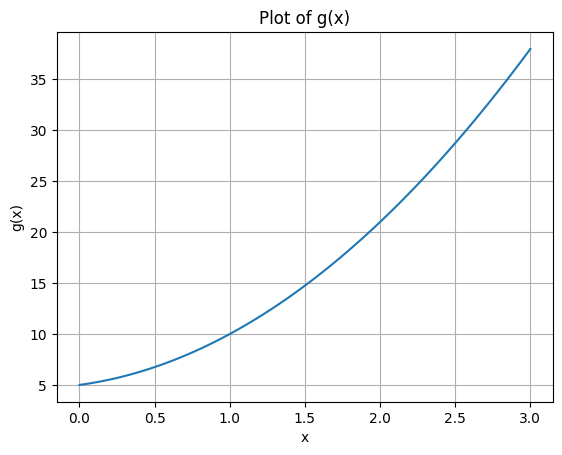

Integration value using numerical integration: 51.0


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate

# Define the function g(x)
def g(x):
    return 3*x**2 + 2*x + 5

# Define the range for x values
a = 0
b = 3
x_val = np.linspace(a, b, 100)

# Compute the corresponding y values for g(x)
g_vals = [g(x) for x in x_val]

# Plot the function g(x)
plt.plot(x_val, g_vals)
plt.xlabel('x')
plt.ylabel('g(x)')
plt.title('Plot of g(x)')
plt.grid(True)
plt.show()

# Calculate the definite integral of g(x) from a to b
exact_integral_value, error = integrate.quad(g, a, b)
print("Integration value using numerical integration:", exact_integral_value)


### b)

Monte Carlo Computation. First simulate 𝑛 Uniform(𝑎, 𝑏) random numbers and evaluate 𝑔(∙) at
these values.

In [23]:
#monte carlo integration
import numpy as np

# Define the function g(x)
def g(x):
    return 3*x**2 + 2*x + 5

# Set the number of random samples
n = 1000

# Define the integration limits
a = 0  # lower limit
b = 3  # upper limit

# Generate n random samples uniformly distributed between a and b
u = np.random.uniform(a, b, n)

# Evaluate the function g at each of the random sample points
g_vals_unif = [g(x) for x in u]

# Compute the approximate integral using the average of the function values
# The integral is approximated by the average value of g(x) times the interval length (b-a)
approx_integral = (b - a) * np.mean(g_vals_unif)

# Print the approximate integral
print(approx_integral)


50.92329854512212


### c)

Demonstrate that the Monte Carlo integral converges to the true value of the integral.

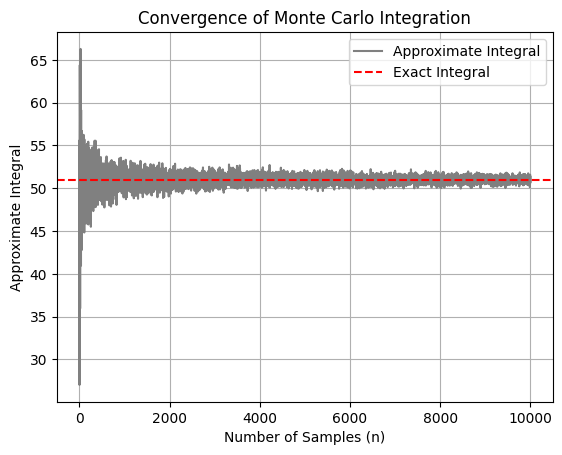

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

# Define the function to integrate
def g(x):
    return 3*x**2 + 2*x + 5

# Number of iterations for Monte Carlo simulation
n = 10000
approx_integral_array = []

# Define the integration limits
a = 0  # lower limit
b = 3  # upper limit

# Perform Monte Carlo integration for increasing sample sizes
for i in range(1, n):
    # Generate 'i' uniformly distributed random samples between 'a' and 'b'
    u = np.random.uniform(a, b, i)
    
    # Evaluate the function 'g' at these sample points
    g_vals_unif = [g(x) for x in u]
    
    # Calculate the approximate integral using the mean of the function values
    approx_integral = (b-a) * np.mean(g_vals_unif)
    
    # Store the approximate integral for this sample size
    approx_integral_array.append(approx_integral)

# Generate an array of sample sizes
n_vals = np.arange(1, n, 1)

# Calculate the exact integral value using numerical integration
exact_integral_value, error = integrate.quad(g, a, b)

# Plot the convergence of the Monte Carlo integration
plt.plot(n_vals, approx_integral_array, color='grey', label='Approximate Integral')
plt.axhline(exact_integral_value, color='red', linestyle='--', label='Exact Integral')
plt.xlabel('Number of Samples (n)')
plt.ylabel('Approximate Integral')
plt.title('Convergence of Monte Carlo Integration')
plt.legend()
plt.grid(True)
plt.show()


### d)

 Monte Carlo integration of the function 𝑓(𝑥) = |sin(100𝑥) + cos(200𝑥)| in the interval [0,1]

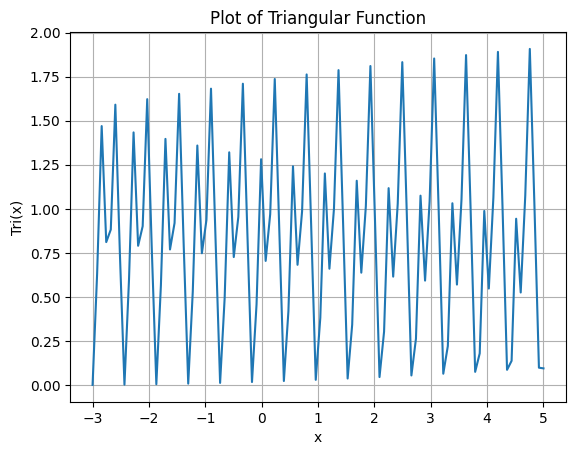

Exact Integral: 0.828393299669083


In [30]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate

# Define the triangular function Tri(x)
def Tri(x):
    # Function to return the absolute value of the sum of sine and cosine functions
    return abs(np.sin(100 * x) + np.cos(200 * x))

# Define integration limits
a = 0  # Lower limit of integration
b = 1  # Upper limit of integration

# Generate x values for plotting the function
x_vals = np.linspace(-3, 5, 100)  # Generate 100 linearly spaced points between -3 and 5

# Evaluate the triangular function at each x value for plotting
g_vals = [Tri(x) for x in x_vals]

# Plot the triangular function
plt.plot(x_vals, g_vals)
plt.title('Plot of Triangular Function')
plt.xlabel('x')
plt.ylabel('Tri(x)')
plt.grid(True)
plt.show()

# Integrate the Triangular function from a to b with increased limit on subdivisions
exact_integral, error_estimate = integrate.quad(Tri, a, b, limit=500) #you can skip limit if you want


# Output the exact integral value
print("Exact Integral:", exact_integral)


In [31]:
#usign monte carlo method 

n = 1000000
u = np.random.uniform(a,b,n)
g_vals_unif = [Tri(x) for x in u]
approx_integral = (b-a)*np.mean(g_vals_unif)
approx_integral

0.8282042879711523

### e)

Comparing two Monte Carlo approximations of the same integral using two different density functions. In the following we approximate the integral 𝐼 = $\int_0^∞ e^{-2x}x^5 dx$ using Monte Carlo simulation. In the following, we consider two approaches to approximate the integral.

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy.integrate as integrate

i) Define the function and evaluate the integral numerically (it is question f in sir's document)

In [3]:
def f1(x):
    return np.e**(-2*x) * (x**5)

def psi1(x):
    return (np.e**-x) * x**5
    
def psi2(x):
    return (x**5)/2

import  scipy.integrate as integrate
h = integrate.quad(f1,0,+np.infty)  # since it is exponential limit will go from 0 to infinity
print('Exact integration for the function  f1(x) :',h[0])


Exact integration for the function  f1(x) : 1.8750000000000007


ii) Evaluate the integral using Exponetial(1) density function.  ( question g in document)

In [8]:
# Set the number of samples for the Monte Carlo simulation
n = 1000000  

# Generate 'n' samples from an exponential distribution with rate 1
u = np.random.exponential(1, n)  

# Apply the function psi1 to each sample
g_vals_exp = [psi1(x) for x in u]  

# Calculate the mean of the function values (Monte Carlo estimate)
approx_integral = np.mean(g_vals_exp)  

print(approx_integral)


1.8777554399845116


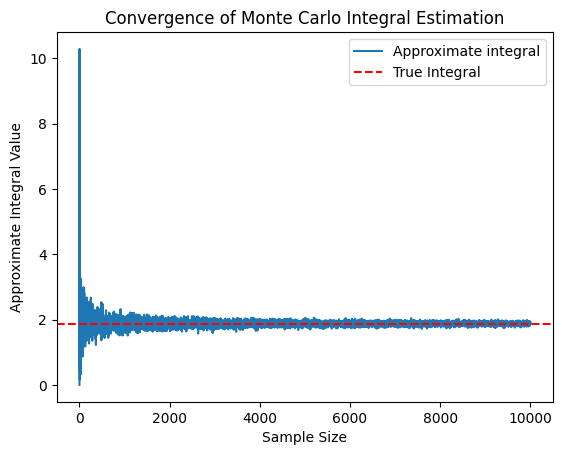

In [9]:
n = 10000  # Set the total number of samples
approx_integral_array = []  # Initialize list to store approximate integral values

# Loop over sample sizes from 1 to 9999
for i in range(1, 10000):
    u = np.random.exponential(1, i)  # Generate 'i' samples from an exponential distribution with rate 1
    g_vals_exp = [psi1(x) for x in u]  # Apply the function psi1 to each sample
    approx_integral = np.mean(g_vals_exp)  # Calculate the mean of the function values (Monte Carlo estimate)
    approx_integral_array.append(approx_integral)  # Store the approximate integral value

n = [i for i in range(1, 10000)]  # Create a list of sample sizes from 1 to 9999
plt.plot(n, approx_integral_array, label='Approximate integral')  # Plot the approximate integral values against sample sizes
plt.axhline(h[0], 0, 10000, color='red', linestyle='--', label='True Integral')  # Plot a horizontal line for the true integral

plt.title('Convergence of Monte Carlo Integral Estimation')  # Set the title of the plot
plt.xlabel('Sample Size')  # Set the x-axis label
plt.ylabel('Approximate Integral Value')  # Set the y-axis label
plt.legend()  # Show legend with labels
plt.show()  # Display the plot


In [ ]:
iii) Evaluate the integral using Exponetial(2) density function 

In [10]:
# Set the number of samples for the Monte Carlo simulation
n = 1000000  

# Generate 'n' samples from an exponential distribution with rate 1/2
u = np.random.exponential(1/2, n)  

# Apply the function psi2 to each sample
g_vals_exp = [psi2(x) for x in u]  

# Calculate the mean of the function values (Monte Carlo estimate)
approx_integral2 = np.mean(g_vals_exp)  

print(approx_integral2)


1.90277631893017


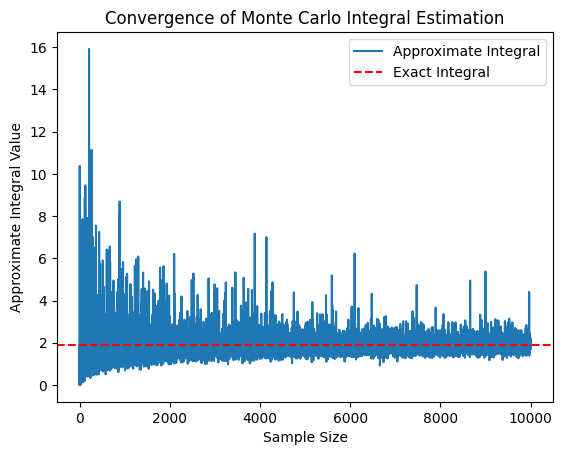

In [11]:
n = 10000  # Set the total number of samples
approx_integral_array = []  # Initialize list to store approximate integral values

# Loop over sample sizes from 1 to 9999
for i in range(1, 10000):
    u = np.random.exponential(1/2, i)  # Generate 'i' samples from an exponential distribution with rate 1/2
    g_vals_exp = [psi2(x) for x in u]  # Apply the function psi2 to each sample
    approx_integral = np.mean(g_vals_exp)  # Calculate the mean of the function values (Monte Carlo estimate)
    approx_integral_array.append(approx_integral)  # Store the approximate integral value

n = [i for i in range(1, 10000)]  # Create a list of sample sizes from 1 to 9999
plt.plot(n, approx_integral_array, label='Approximate Integral')  # Plot the approximate integral values against sample sizes
plt.axhline(h[0], 0, 10000, color='red', linestyle='--', label='Exact Integral')  # Plot a horizontal line for the exact integral

plt.title('Convergence of Monte Carlo Integral Estimation')  # Set the title of the plot
plt.xlabel('Sample Size')  # Set the x-axis label
plt.ylabel('Approximate Integral Value')  # Set the y-axis label
plt.legend()  # Show legend with labels
plt.show()  # Display the plot


In [ ]:
iv) Compare the approximations as a function on 𝑛

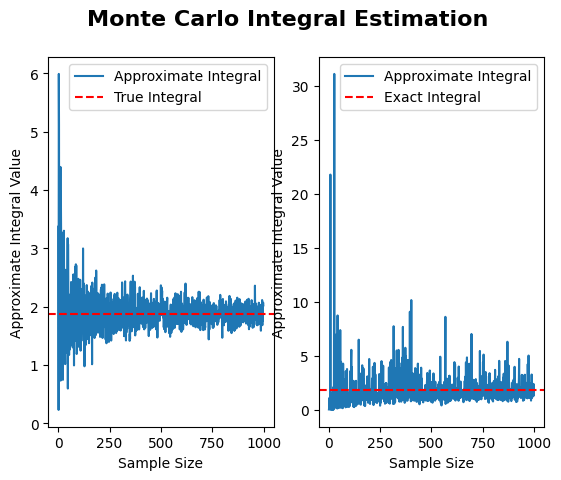

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Set the range of sample sizes
n_vals = np.arange(1, 1000, 1)

# Initialize lists to store approximate integral values
I1 = []
I2 = []

# Compute approximate integrals for psi1 using an exponential distribution with rate 1
for n in n_vals:
    x = np.random.exponential(1, n)
    g_vals_exp = [psi1(i) for i in x]
    approx_integral = np.mean(g_vals_exp)
    I1.append(approx_integral)

# Compute approximate integrals for psi2 using an exponential distribution with rate 1/2
for n in n_vals:
    x = np.random.exponential(1/2, n)
    g_vals_exp = [psi2(i) for i in x]
    approx_integral = np.mean(g_vals_exp)
    I2.append(approx_integral)

# Plot the results for psi1
plt.subplot(1, 2, 1)
plt.plot(n_vals, I1, label='Approximate Integral')
plt.axhline(h[0], color='red', linestyle='--', label='True Integral')
plt.xlabel('Sample Size')
plt.ylabel('Approximate Integral Value')
plt.legend()  # Show legend with labels

# Plot the results for psi2
plt.subplot(1, 2, 2)
plt.plot(n_vals, I2, label='Approximate Integral')
plt.axhline(h[0], color='red', linestyle='--', label='Exact Integral')
plt.xlabel('Sample Size')
plt.ylabel('Approximate Integral Value')
plt.legend()  # Show legend with labels

# Set the main title for the plot
plt.suptitle('Monte Carlo Integral Estimation', fontsize=16, fontweight='bold')

# Display the plot
plt.show()


v) question j and k in sir's document

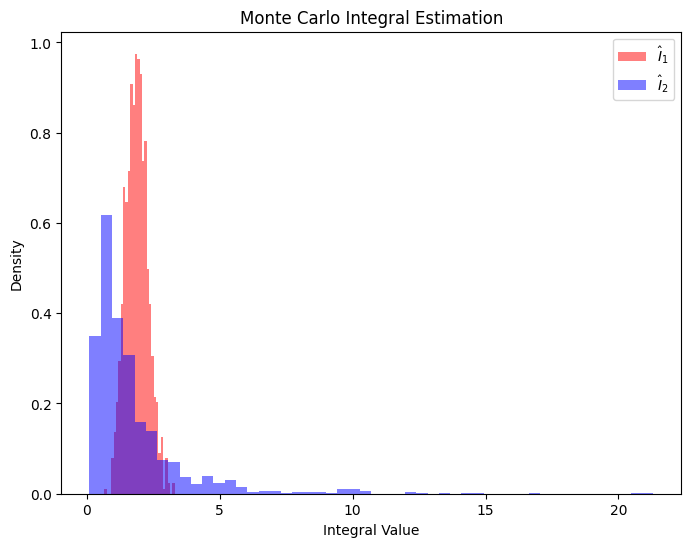

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Number of samples for each Monte Carlo estimation
n = 100

# Number of Monte Carlo estimations
M = 1000

# Initialize lists to store approximate integral values
I1 = []
I2 = []

# Compute M approximate integrals for psi1 using an exponential distribution with rate 1
for _ in range(M):
    x = np.random.exponential(1, n)
    g_vals_exp = [psi1(i) for i in x]
    approx_integral = np.mean(g_vals_exp)
    I1.append(approx_integral)

# Compute M approximate integrals for psi2 using an exponential distribution with rate 1/2
for _ in range(M):
    x = np.random.exponential(1/2, n)
    g_vals_exp = [psi2(i) for i in x]
    approx_integral = np.mean(g_vals_exp)
    I2.append(approx_integral)

# Create the histogram plot
plt.figure(figsize=(8, 6))
plt.hist(I1, bins=30, density=True, color='red', alpha=0.5, label=r'$\widehat{I}_1$')
plt.hist(I2, bins=50, density=True, color='blue', alpha=0.5, label=r'$\widehat{I}_2$')
plt.title('Monte Carlo Integral Estimation')
plt.xlabel('Integral Value')
plt.ylabel('Density')
plt.legend()

# Display the plot
plt.show()


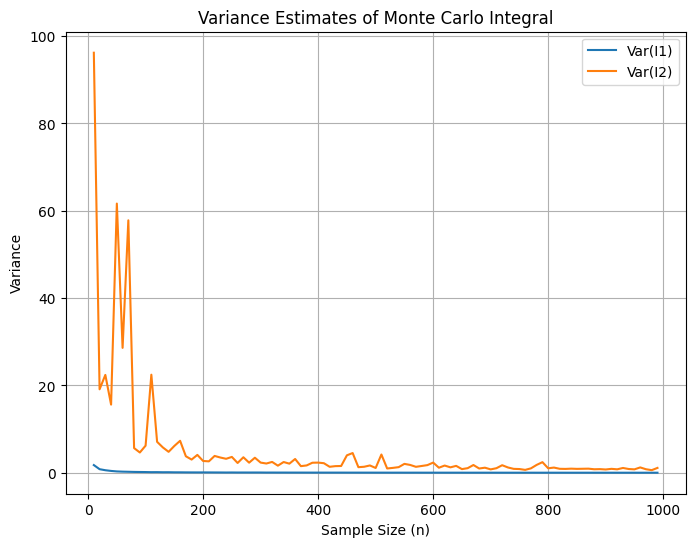

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Sample sizes
n_vals = np.arange(10, 1000, 10)

# Number of Monte Carlo simulations
M = 1000

# Lists to store variance estimates
varI1 = []
varI2 = []

# Calculate variance estimates for I1 and I2 at different sample sizes
for n in n_vals:
    # Calculate variance of I1 for sample size n
    I1 = [np.mean([psi1(i) for i in np.random.exponential(1, n)]) for _ in range(M)]
    varI1.append(np.var(I1))

    # Calculate variance of I2 for sample size n
    I2 = [np.mean([psi2(i) for i in np.random.exponential(1/2, n)]) for _ in range(M)]
    varI2.append(np.var(I2))

# Plotting variance estimates vs sample sizes
plt.figure(figsize=(8, 6))
plt.plot(n_vals, varI1, label='Var(I1)')
plt.plot(n_vals, varI2, label='Var(I2)')

# Add title, legend, and labels
plt.title('Variance Estimates of Monte Carlo Integral')
plt.xlabel('Sample Size (n)')
plt.ylabel('Variance')
plt.legend()

plt.grid(True)  # Add grid for better visualization

plt.show()
